In [1]:

from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')
data=data[data["LAT"]!=-1.0]
print("Shape of the DataFrame:", data.shape)


data.head()

from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))
def f(x):
    return haversine_distance(x["LONG"],x['LAT'],x['LONG_POLICE_STATION'],x['LAT_POLICE_STATION'])

data["distance"]=data.apply(f, axis=1)





Shape of the DataFrame: (237065, 9)


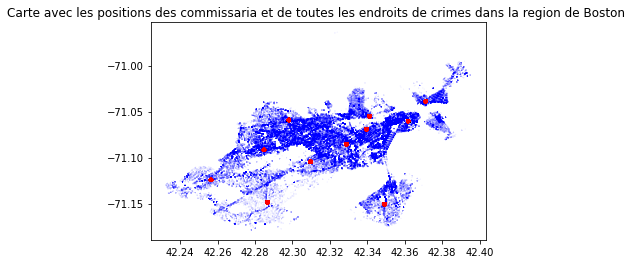

In [2]:
import  matplotlib.pyplot as plt 
df=data[data["LAT"]!=-1.0]
def mapploter(df):
    x=df[["LAT_POLICE_STATION"]]
    x=x.to_numpy().T[0].tolist()
    y=df[["LONG_POLICE_STATION"]]
    y=y.to_numpy().T[0].tolist()
    c=["red" for i in range(len(x))]
    s=[10 for i in range(len(x))]
    xx=df[["LAT"]]
    xx=xx.to_numpy().T[0].tolist()
    yy=df[["LONG"]]
    yy=yy.to_numpy().T[0].tolist()
    cc=["blue" for i in range(len(xx))]
    ss=[0.00051 for i in range(len(xx))]
    c.extend(cc)
    s.extend(ss)
    x.extend(xx)
    y.extend(yy)
    plt.scatter(x[::-1],y[::-1],s=s[::-1],c=c[::-1])

plt.title("Carte avec les positions des commissaria et de toutes les endroits de crimes dans la region de Boston ")

mapploter(df)


# Repositionnement des  commissaria de Boston pret des foyé de criminalité
 On se pose la question est ce que les commissariat sont bien positionner
 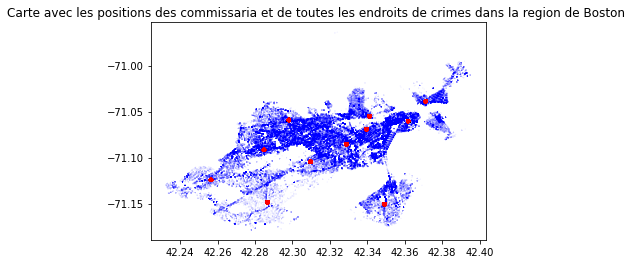
 

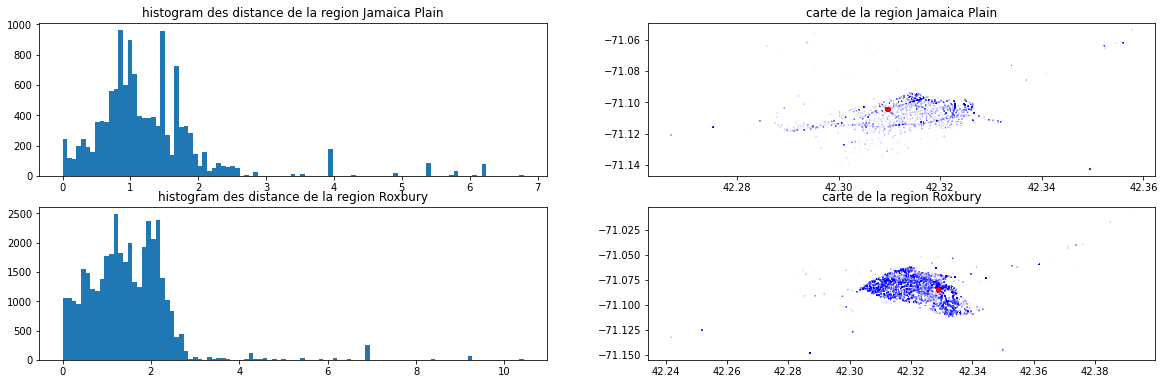

In [3]:
import numpy as np
cmp=1
theset=set(data["NAME"].tolist())
theset=[i for i in theset]
plt.figure(figsize=(20,40)) 

for i in theset[2:4]:

    df=data[data["NAME"]==i]
    bins=np.linspace(0,df[["distance"]].max(),100).T[0].tolist()
    plt.subplot(len(theset),2,cmp,title="histogram des distance de la region "+i)
    
    cmp+=1
    
    
    plt.hist(df["distance"],bins=bins)
    plt.subplot(len(theset),2,cmp,title="carte de la region "+i)
    
    mapploter(df)
    
    cmp+=1

#plt.title(" a droite Les histogrames des distributions des distance entre les scene crimes et les comissarias, a gauche les positions des commisarias et les scenes de crimes qu'ils ons declarer")



on vois que dans certainne regions de boston, les commissarias sont tres eloigné des foyé de criminalité. D'autres ons besoin de au moin deux commissarias, comme par exemple a East Boston

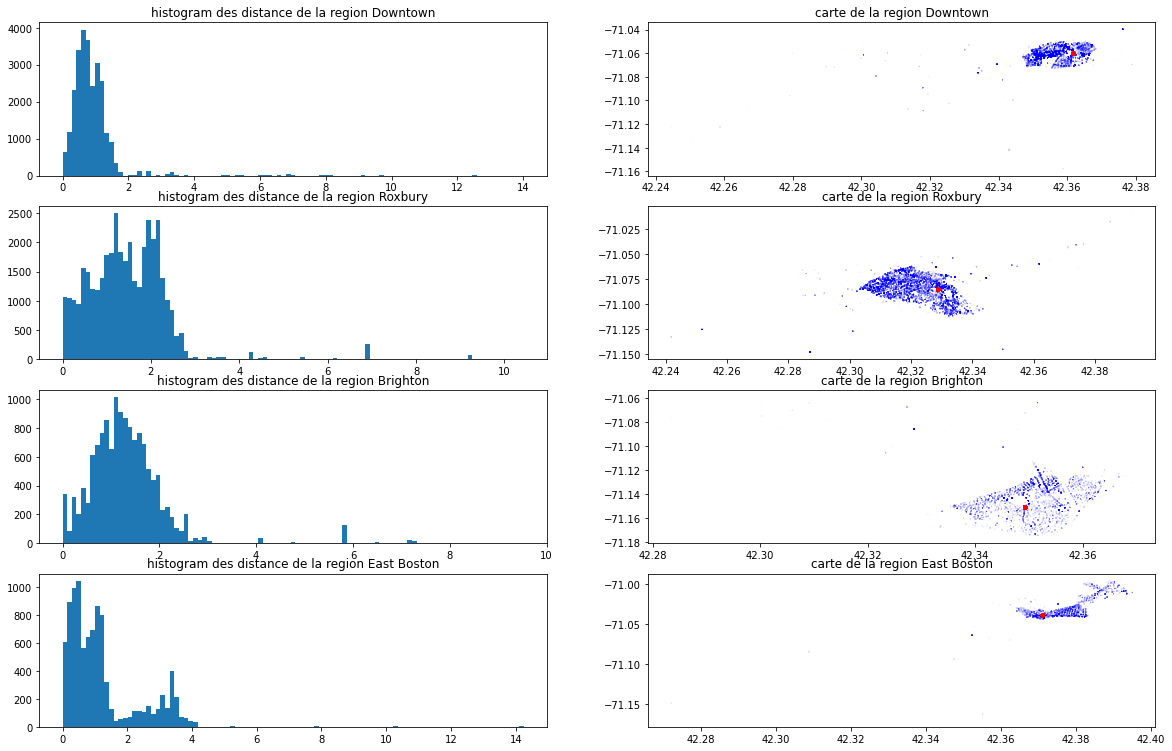





In [4]:
from sklearn.cluster import KMeans
import numpy as np
df=data[data["LAT"]!=-1.0]
df=df[["LAT","LONG"]]

kmeans = KMeans(n_clusters=20, random_state=0).fit(df)




Text(0.5, 1.0, "nouveau positionnement des commissarias de Boston en utilisant l'algorithm des kmeans")

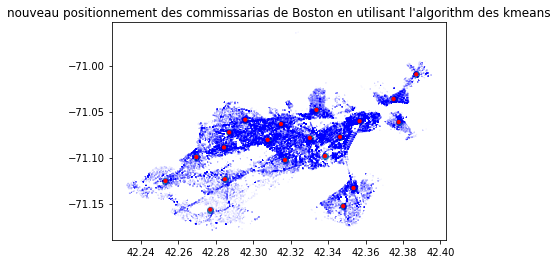

In [5]:
kmeans.predict(df)
new=kmeans.cluster_centers_

plt.scatter(new[:,0],new[:,1])

x=new[:,0]
x=x.tolist()
y=new[:,1]

y=y.tolist()
c=["red" for i in range(len(x))]
s=[10 for i in range(len(x))]
xx=df[["LAT"]]
xx=xx.to_numpy().T[0].tolist()
yy=df[["LONG"]]
yy=yy.to_numpy().T[0].tolist()
cc=["blue" for i in range(len(xx))]
ss=[0.00051 for i in range(len(xx))]
c.extend(cc)
s.extend(ss)
x.extend(xx)
y.extend(yy)


plt.scatter(x[::-1],y[::-1],s=s[::-1],c=c[::-1])
plt.title("nouveau positionnement des commissarias de Boston en utilisant l'algorithm des kmeans")




# On propose de changer les positions des commissarias dans certaines regions et rajouter  des commissaria dans d'autres



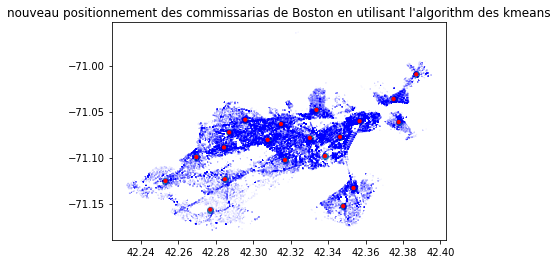




